# Thermal Comfort Classifier V3.0
###### by Muhammad Zhafran A F, Danang Wahyu K, and Haidar Alghazian A

What's new?
* Using all features first to evaluate models
* Feature Importance
* Model evaluation using top features in feature importance

## Data Acquisition

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/mzhafranaf/Final-Project-Orbit/main/darjeeling.csv"
dataset = pd.read_csv(url)

In [3]:
dataset.head()

,month,season,Location,sex,Subject Code,TSV,TP,air_ts,air_tp,RH_ts,...,PMV,PPD,TnG_R_0.5,Tmr,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33,Unnamed: 32
0,1.0,1.0,S0135,1.0,FSL1,-1.0,-1,0,0,-1.0,...,0.768705,16.575062,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
1,1.0,1.0,S0135,1.0,FSL2,-1.0,-1,-1,0,1.0,...,0.236143,6.148326,26.860770,25.521541,24.860770,18.5,19.238792,28.860770,27.891073,0.0
2,1.0,1.0,S0135,1.0,FSL3,-1.0,-1,-1,0,1.0,...,0.246064,6.246280,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
3,1.0,1.0,S0135,1.0,FSL4,-1.0,-1,-1,0,1.0,...,0.299259,6.838386,26.843366,25.786732,24.843366,18.5,19.238792,28.843366,27.873669,0.0
4,1.0,1.0,S0135,1.0,FSL5,0.0,0,0,0,0.0,...,-0.444504,9.015203,24.755364,25.510728,24.755364,18.5,19.238792,24.755364,24.755364,0.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2608 non-null   float64
 1   season        2608 non-null   float64
 2   Location      2608 non-null   object 
 3   sex           2608 non-null   float64
 4   Subject Code  2608 non-null   object 
 5   TSV           2608 non-null   float64
 6   TP            2608 non-null   object 
 7   air_ts        2608 non-null   object 
 8   air_tp        2608 non-null   object 
 9   RH_ts         2608 non-null   float64
 10  RH_tp         2608 non-null   float64
 11  comfort       2608 non-null   object 
 12  prod          2608 non-null   object 
 13  TA            2608 non-null   object 
 14  clo           2608 non-null   float64
 15  Uphols        2608 non-null   object 
 16  clo_tot       2608 non-null   float64
 17  met           2608 non-null   float64
 18  sh_sw         2608 non-null 

## Data Cleaning

In [5]:
dataset.isnull().sum()

month            400
season           400
Location         400
sex              400
Subject Code     400
TSV              400
TP               400
air_ts           400
air_tp           400
RH_ts            400
RH_tp            400
comfort          400
prod             400
TA               400
clo              400
Uphols           400
clo_tot          400
met              400
sh_sw            400
Ti               400
Tg               400
Va               400
RH               400
PMV              400
PPD              400
TnG_R_0.5        400
Tmr              400
Top              400
Tout             400
Trm              400
TnG_R_0.25       400
TnG_R_0.33       400
Unnamed: 32     2438
dtype: int64

There's unnamed feature that should remove from our data

In [6]:
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2608 non-null   float64
 1   season        2608 non-null   float64
 2   Location      2608 non-null   object 
 3   sex           2608 non-null   float64
 4   Subject Code  2608 non-null   object 
 5   TSV           2608 non-null   float64
 6   TP            2608 non-null   object 
 7   air_ts        2608 non-null   object 
 8   air_tp        2608 non-null   object 
 9   RH_ts         2608 non-null   float64
 10  RH_tp         2608 non-null   float64
 11  comfort       2608 non-null   object 
 12  prod          2608 non-null   object 
 13  TA            2608 non-null   object 
 14  clo           2608 non-null   float64
 15  Uphols        2608 non-null   object 
 16  clo_tot       2608 non-null   float64
 17  met           2608 non-null   float64
 18  sh_sw         2608 non-null 

There's some numeric features that's declared as object type. So, we should convert it to float64 type.

In [7]:
data = dataset.dropna()
#data

In [8]:
# remove Location and Subject Code
data = data.drop(['Location','Subject Code'], axis=1)

In [9]:
objectFeatures = ['TP','air_ts', 'air_tp', 'comfort', 'prod', 'TA', 'Uphols', 'sh_sw']

for i in objectFeatures:
    data[i] = pd.to_numeric(data[i],errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 0 to 2607
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       2608 non-null   float64
 1   season      2608 non-null   float64
 2   sex         2608 non-null   float64
 3   TSV         2608 non-null   float64
 4   TP          2607 non-null   float64
 5   air_ts      2604 non-null   float64
 6   air_tp      2604 non-null   float64
 7   RH_ts       2608 non-null   float64
 8   RH_tp       2608 non-null   float64
 9   comfort     2605 non-null   float64
 10  prod        2603 non-null   float64
 11  TA          2573 non-null   float64
 12  clo         2608 non-null   float64
 13  Uphols      2558 non-null   float64
 14  clo_tot     2608 non-null   float64
 15  met         2608 non-null   float64
 16  sh_sw       2516 non-null   float64
 17  Ti          2608 non-null   float64
 18  Tg          2608 non-null   float64
 19  Va          2608 non-null  

In [10]:
data.isnull().sum()

month          0
season         0
sex            0
TSV            0
TP             1
air_ts         4
air_tp         4
RH_ts          0
RH_tp          0
comfort        3
prod           5
TA            35
clo            0
Uphols        50
clo_tot        0
met            0
sh_sw         92
Ti             0
Tg             0
Va             0
RH             0
PMV            0
PPD            0
TnG_R_0.5      0
Tmr            0
Top            0
Tout           0
Trm            0
TnG_R_0.25     0
TnG_R_0.33     0
dtype: int64

In [11]:
data = data.dropna()

Because we want to focused on TSV, we should know how many data for each class in TSV

In [12]:
data.TSV.unique()

array([-1.,  0.,  1., -2.,  2., -3.,  3.])

In [13]:
data['TSV'].value_counts()

-1.0    799
 0.0    777
 1.0    532
-2.0    175
 2.0     88
-3.0     47
 3.0     16
Name: TSV, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<AxesSubplot:xlabel='TSV', ylabel='count'>

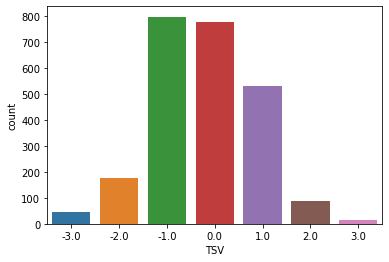

In [15]:
sns.countplot(x='TSV', data=data, order=data.TSV.unique().sort())

In [16]:
# data.TSV.replace({-3 : 0,-2 : 0,-1 : 0,0 : 1,1 : 2,2 : 2,3 : 2}, inplace=True)

## Data Exploration

In [17]:
"""
Explore data on 3 section
1. Full Data --> all of parameter in dataset
2. Main Data --> only 6 parameter (ASHRAE-55)
3. Others Data --> exclude main parameter
"""
main_parameter = ["Ti", "RH", "Tmr", "Va", "met", "clo"]
target_label = ["TSV"]
others_parameter = []
for i in data.columns:
    if i not in (main_parameter+target_label):
        others_parameter.append(i)
            
full_data = data[main_parameter + others_parameter + target_label]
main_data = data[main_parameter + target_label]
others_data = data[others_parameter + target_label]

### Statistic

In [18]:
full_data.describe()

,Ti,RH,Tmr,Va,met,clo,month,season,sex,TP,...,Tg,PMV,PPD,TnG_R_0.5,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33,TSV
count,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,...,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000
mean,20.751143,66.900357,21.544970,0.181730,1.111779,0.845556,6.082169,1.640920,1.571076,-0.275267,...,21.058069,-0.370420,31.460548,21.498228,21.059444,18.041304,18.138426,21.937012,21.724268,-0.219392
std,4.986744,11.967743,6.061650,0.277182,0.117061,0.336807,3.520334,0.479829,0.495024,0.786124,...,5.248398,1.203898,25.879182,4.948298,5.270119,6.386078,6.475272,5.523757,5.140701,1.079047
min,8.200000,30.500000,8.119420,0.000000,0.700000,0.070000,1.000000,1.000000,1.000000,-2.000000,...,9.100000,-4.343513,5.000000,11.119614,9.119614,5.695017,7.312087,8.705920,10.368944,-3.000000
25%,16.600000,60.300000,16.509329,0.100000,1.100000,0.580000,3.000000,1.000000,1.000000,-1.000000,...,16.500000,-1.221696,8.590282,17.784206,16.501453,13.200000,12.843523,18.631343,18.328465,-1.000000
50%,20.200000,69.440000,21.064093,0.100000,1.100000,0.780000,6.000000,2.000000,2.000000,0.000000,...,20.700000,-0.525237,23.011926,20.693815,20.673266,17.107973,18.139126,21.370869,21.128767,0.000000
75%,23.775000,75.400000,24.965447,0.100000,1.100000,1.050000,9.000000,2.000000,2.000000,0.000000,...,24.400000,0.266625,48.745915,24.513932,24.296230,22.553654,21.568475,24.863393,24.722306,1.000000
max,32.500000,94.000000,47.004464,2.200000,3.000000,2.210000,12.000000,2.000000,2.000000,2.000000,...,34.400000,3.850433,99.999990,36.133242,34.895100,31.250000,31.508678,40.133242,38.193848,3.000000


In [19]:
main_data.describe()

,Ti,RH,Tmr,Va,met,clo,TSV
count,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000
mean,20.751143,66.900357,21.544970,0.181730,1.111779,0.845556,-0.219392
std,4.986744,11.967743,6.061650,0.277182,0.117061,0.336807,1.079047
min,8.200000,30.500000,8.119420,0.000000,0.700000,0.070000,-3.000000
25%,16.600000,60.300000,16.509329,0.100000,1.100000,0.580000,-1.000000
50%,20.200000,69.440000,21.064093,0.100000,1.100000,0.780000,0.000000
75%,23.775000,75.400000,24.965447,0.100000,1.100000,1.050000,1.000000
max,32.500000,94.000000,47.004464,2.200000,3.000000,2.210000,3.000000


In [20]:
others_data.describe()

,month,season,sex,TP,air_ts,air_tp,RH_ts,RH_tp,comfort,prod,...,Tg,PMV,PPD,TnG_R_0.5,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33,TSV
count,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,...,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000
mean,6.082169,1.640920,1.571076,-0.275267,-0.368529,-0.113804,-0.258833,-0.077239,2.677075,0.056286,...,21.058069,-0.370420,31.460548,21.498228,21.059444,18.041304,18.138426,21.937012,21.724268,-0.219392
std,3.520334,0.479829,0.495024,0.786124,1.082770,0.743647,1.054795,0.679534,0.894836,0.672790,...,5.248398,1.203898,25.879182,4.948298,5.270119,6.386078,6.475272,5.523757,5.140701,1.079047
min,1.000000,1.000000,1.000000,-2.000000,-3.000000,-2.000000,-3.000000,-2.000000,0.000000,-2.000000,...,9.100000,-4.343513,5.000000,11.119614,9.119614,5.695017,7.312087,8.705920,10.368944,-3.000000
25%,3.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,2.000000,0.000000,...,16.500000,-1.221696,8.590282,17.784206,16.501453,13.200000,12.843523,18.631343,18.328465,-1.000000
50%,6.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,20.700000,-0.525237,23.011926,20.693815,20.673266,17.107973,18.139126,21.370869,21.128767,0.000000
75%,9.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,24.400000,0.266625,48.745915,24.513932,24.296230,22.553654,21.568475,24.863393,24.722306,1.000000
max,12.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,6.000000,2.000000,...,34.400000,3.850433,99.999990,36.133242,34.895100,31.250000,31.508678,40.133242,38.193848,3.000000


#### Outlier Analysis

<AxesSubplot:title={'center':'Full Data Boxplot'}>

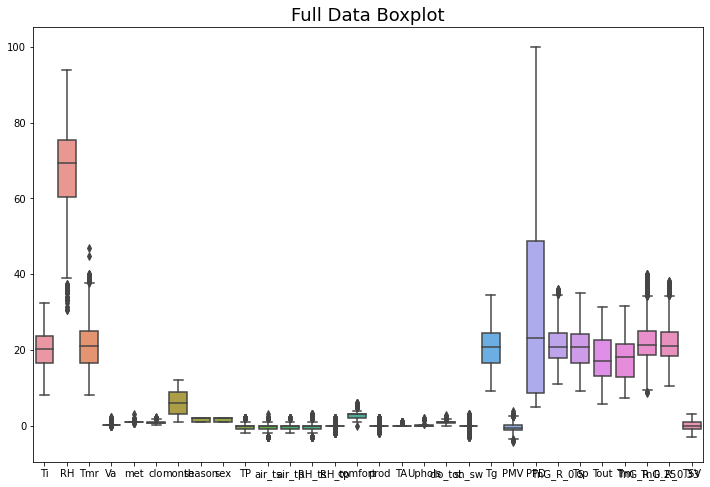

In [21]:
plt.figure(figsize=(12,8))
plt.title("Full Data Boxplot", size=18)
sns.boxplot(data=full_data)

<AxesSubplot:title={'center':'Main Data Boxplot'}>

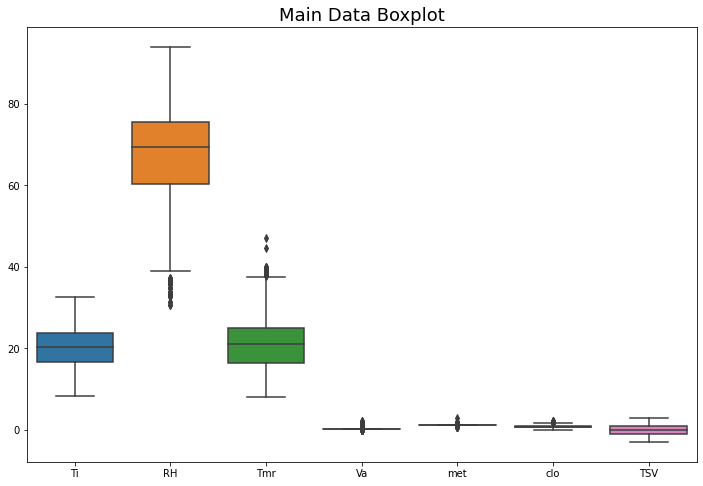

In [22]:
plt.figure(figsize=(12,8))
plt.title("Main Data Boxplot", size=18)
sns.boxplot(data=main_data)

<AxesSubplot:title={'center':'Others Data Boxplot'}>

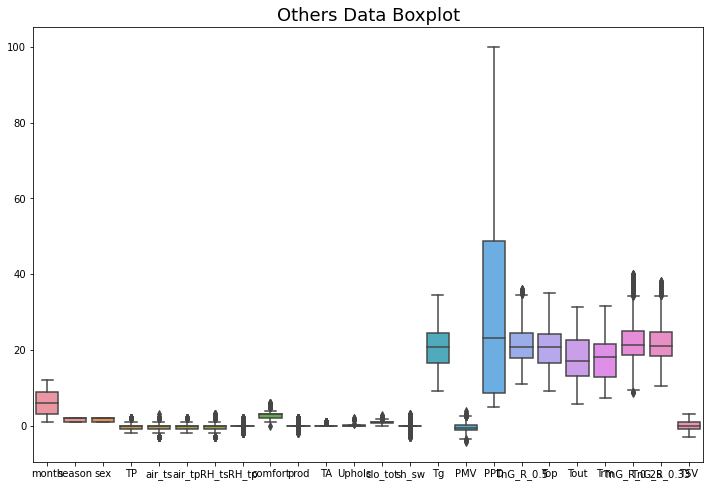

In [23]:
plt.figure(figsize=(12,8))
plt.title("Others Data Boxplot", size=18)
sns.boxplot(data=others_data)

### Correation Matrix

#### Full

<AxesSubplot:>

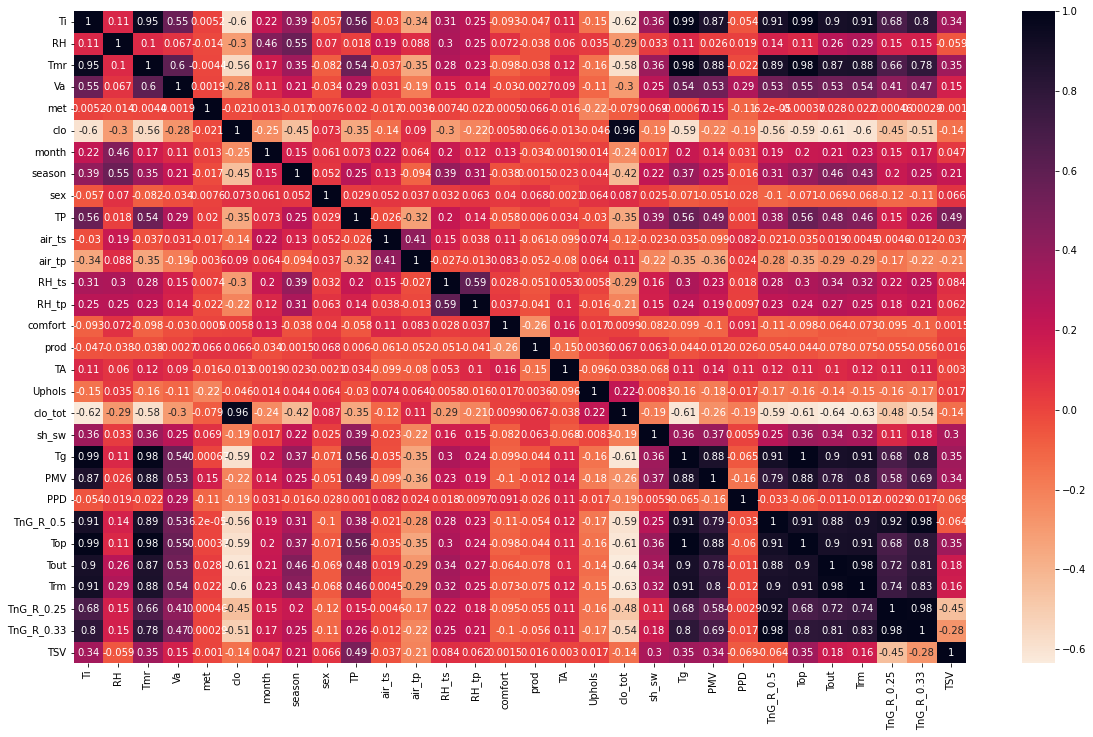

In [24]:
plt.figure(figsize=(20,12))
cor = full_data.corr()
sns.heatmap(cor,annot=True,cmap='rocket_r')

In [25]:
#Correlation with output variable
cor_target = abs(cor["TSV"])

#Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.5]
relevant_features = cor_target[cor_target>0.3]
relevant_features

Ti            0.336710
Tmr           0.353391
TP            0.489386
sh_sw         0.304330
Tg            0.348942
PMV           0.338905
Top           0.349318
TnG_R_0.25    0.448108
TSV           1.000000
Name: TSV, dtype: float64

#### Main

<AxesSubplot:>

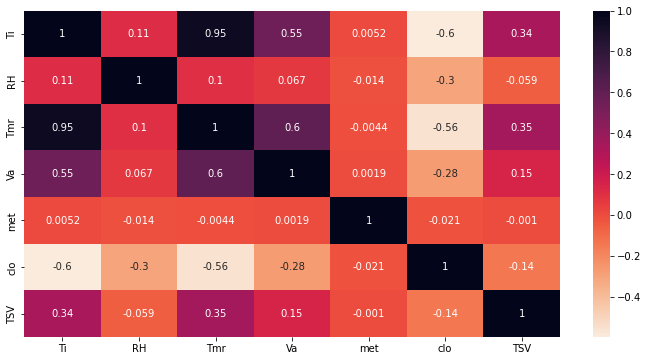

In [26]:
plt.figure(figsize=(12,6))
cor = main_data.corr()
sns.heatmap(cor,annot=True,cmap='rocket_r')

In [27]:
#Correlation with output variable
cor_target = abs(cor["TSV"])

#Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.5]
relevant_features = cor_target[cor_target>0.3]
relevant_features

Ti     0.336710
Tmr    0.353391
TSV    1.000000
Name: TSV, dtype: float64

#### Others

<AxesSubplot:>

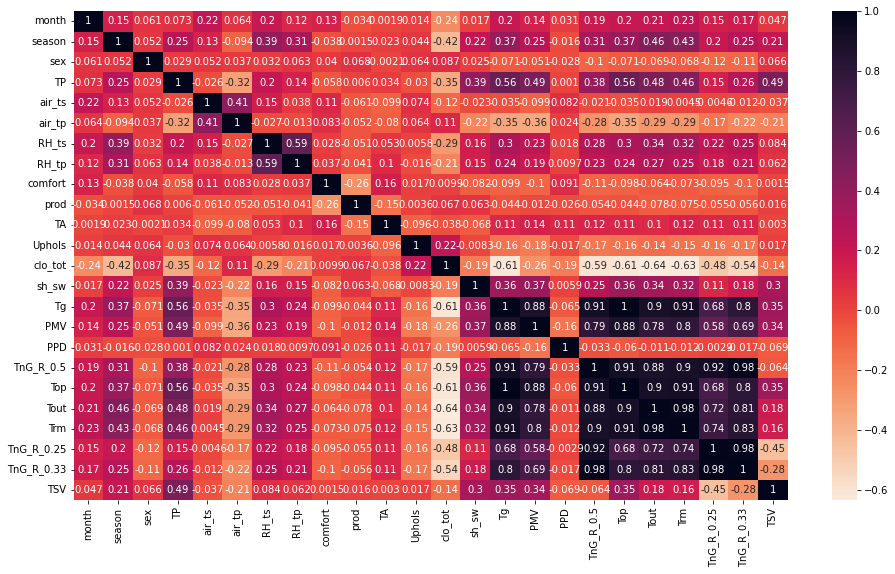

In [28]:
plt.figure(figsize=(16,9))
cor = others_data.corr()
sns.heatmap(cor,annot=True,cmap='rocket_r')

In [29]:
#Correlation with output variable
cor_target = abs(cor["TSV"])

#Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.5]
relevant_features = cor_target[cor_target>0.3]
relevant_features

TP            0.489386
sh_sw         0.304330
Tg            0.348942
PMV           0.338905
Top           0.349318
TnG_R_0.25    0.448108
TSV           1.000000
Name: TSV, dtype: float64

# Classification

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.inspection import permutation_importance

## Standarization

In [58]:
scaler = StandardScaler()

#Full data
y_full = full_data[['TSV']].values.ravel()
X_full = full_data.drop(['TSV'], axis=1)

X_full = pd.DataFrame(scaler.fit_transform(X_full),columns = X_full.columns)


#Main data
y_main = main_data[['TSV']].values.ravel()
X_main = main_data.drop(['TSV'], axis=1)

X_main = pd.DataFrame(scaler.fit_transform(X_main),columns = X_main.columns)


#Others data
y_others = others_data[['TSV']].values.ravel()
X_others = others_data.drop(['TSV'], axis=1)

X_others = pd.DataFrame(scaler.fit_transform(X_others),columns = X_others.columns)

## Splitting Data

In [59]:
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

print(X_full_train.shape, X_full_test.shape)
print(y_full_train.shape, y_full_test.shape)

(1703, 29) (731, 29)
(1703,) (731,)


In [60]:
X_main_train, X_main_test, y_main_train, y_main_test = train_test_split(X_main, y_main, test_size=0.3, random_state=42)

print(X_main_train.shape, X_main_test.shape)
print(y_main_train.shape, y_main_test.shape)

(1703, 6) (731, 6)
(1703,) (731,)


In [61]:
X_others_train, X_others_test, y_others_train, y_others_test = train_test_split(X_others, y_others, test_size=0.3, random_state=42)

print(X_others_train.shape, X_others_test.shape)
print(y_others_train.shape, y_others_test.shape)

(1703, 23) (731, 23)
(1703,) (731,)


## Modeling

In [62]:
model = RandomForestClassifier()

### Full Data

In [63]:
model.fit(X_full_train, y_full_train)
y_full_pred = model.predict(X_full_test)

In [64]:
trainAccuracy = accuracy_score(y_full_train, model.predict(X_full_train))
testAccuracy = accuracy_score(y_full_test, y_full_pred)

print(f"Train Accuracy : {trainAccuracy}")
print(f"Test Accuracy  : {testAccuracy}")

Train Accuracy : 1.0
Test Accuracy  : 0.9699042407660738


In [65]:
print(classification_report(y_full_test, y_full_pred))

              precision    recall  f1-score   support

        -3.0       1.00      0.57      0.73        14
        -2.0       0.89      0.90      0.89        60
        -1.0       0.97      1.00      0.99       233
         0.0       1.00      1.00      1.00       223
         1.0       0.96      1.00      0.98       165
         2.0       0.93      0.79      0.85        33
         3.0       1.00      0.33      0.50         3

    accuracy                           0.97       731
   macro avg       0.96      0.80      0.85       731
weighted avg       0.97      0.97      0.97       731



<AxesSubplot:>

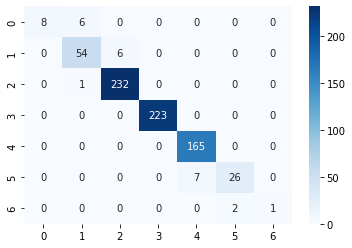

In [66]:
cm = confusion_matrix(y_full_test, y_full_pred)
sns.heatmap(cm, cmap ='Blues', annot =True, fmt='g')

#### Permutation Importance

In [67]:
#pip install eli5
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

In [68]:
perm = PermutationImportance(model, random_state=1).fit(X_full_test, y_full_test)
show_weights(perm, feature_names = list(X_full_test.columns))

Weight,Feature
0.3565 ± 0.0236,TnG_R_0.25
0.0443 ± 0.0079,TnG_R_0.33
0.0167 ± 0.0040,TnG_R_0.5
0.0134 ± 0.0076,Tg
0.0129 ± 0.0084,Top
0.0090 ± 0.0037,Tmr
0.0060 ± 0.0028,TP
0.0033 ± 0.0033,Uphols
0.0030 ± 0.0020,Va
0.0022 ± 0.0033,Tout


## Main Data

In [69]:
model.fit(X_main_train, y_main_train)
y_main_pred = model.predict(X_main_test)

In [70]:
trainAccuracy = accuracy_score(y_main_train, model.predict(X_main_train))
testAccuracy = accuracy_score(y_main_test, y_main_pred)

print(f"Train Accuracy : {trainAccuracy}")
print(f"Test Accuracy  : {testAccuracy}")

Train Accuracy : 0.9829712272460364
Test Accuracy  : 0.5075239398084815


In [71]:
print(classification_report(y_main_test, y_main_pred))

              precision    recall  f1-score   support

        -3.0       0.42      0.36      0.38        14
        -2.0       0.40      0.20      0.27        60
        -1.0       0.52      0.58      0.55       233
         0.0       0.49      0.57      0.53       223
         1.0       0.56      0.54      0.55       165
         2.0       0.29      0.06      0.10        33
         3.0       0.00      0.00      0.00         3

    accuracy                           0.51       731
   macro avg       0.38      0.33      0.34       731
weighted avg       0.50      0.51      0.49       731



<AxesSubplot:>

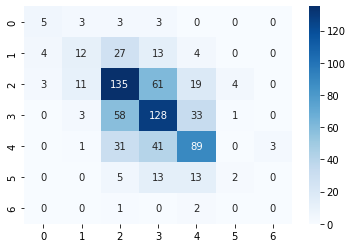

In [72]:
cm = confusion_matrix(y_main_test, y_main_pred)
sns.heatmap(cm, cmap ='Blues', annot =True, fmt='g')

#### Permutation Importance

In [73]:
perm = PermutationImportance(model, random_state=1).fit(X_main_test, y_main_test)
show_weights(perm, feature_names = list(X_main_test.columns))

Weight,Feature
0.1450 ± 0.0161,Tmr
0.1166 ± 0.0200,Ti
0.0903 ± 0.0278,RH
0.0484 ± 0.0234,clo
0.0036 ± 0.0037,Va
-0.0033 ± 0.0059,met


## Others Data

In [74]:
model.fit(X_others_train, y_others_train)
y_others_pred = model.predict(X_others_test)

In [75]:
trainAccuracy = accuracy_score(y_others_train, model.predict(X_others_train))
testAccuracy = accuracy_score(y_others_test, y_others_pred)

print(f"Train Accuracy : {trainAccuracy}")
print(f"Test Accuracy  : {testAccuracy}")

Train Accuracy : 1.0
Test Accuracy  : 0.9644322845417237


In [76]:
print(classification_report(y_others_test, y_others_pred))

              precision    recall  f1-score   support

        -3.0       1.00      0.64      0.78        14
        -2.0       0.90      0.87      0.88        60
        -1.0       0.97      0.99      0.98       233
         0.0       0.99      1.00      1.00       223
         1.0       0.95      1.00      0.98       165
         2.0       0.93      0.76      0.83        33
         3.0       1.00      0.33      0.50         3

    accuracy                           0.96       731
   macro avg       0.96      0.80      0.85       731
weighted avg       0.96      0.96      0.96       731



<AxesSubplot:>

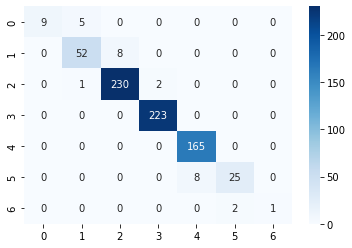

In [77]:
cm = confusion_matrix(y_others_test, y_others_pred)
sns.heatmap(cm, cmap ='Blues', annot =True, fmt='g')

#### Permutation Importance

In [78]:
perm = PermutationImportance(model, random_state=1).fit(X_others_test, y_others_test)
show_weights(perm, feature_names = list(X_others_test.columns))

Weight,Feature
0.2952 ± 0.0228,TnG_R_0.25
0.0640 ± 0.0044,Top
0.0413 ± 0.0047,Tg
0.0378 ± 0.0041,TnG_R_0.33
0.0118 ± 0.0051,TnG_R_0.5
0.0085 ± 0.0040,TP
0.0027 ± 0.0052,Trm
0.0014 ± 0.0046,Tout
0.0005 ± 0.0013,Uphols
0.0005 ± 0.0022,RH_tp
